# Table of contents:

1. [Introduction](#introduction)
    * [The Indian Premier League](#ipl)
    * [The IPL Auction](#auction)
2. [Motivation](#motivation)
    * [Dynamic nature of the auction](#dynamic-nature)
3. [Objective](#objective)
    * [Aim of the study](#aim)
    * [Research questions](#research-questions)
4. [Importance](#importance)
5. [Proposed methodology](#methodology)
6. [Data Acquisition](#data-aquisition)
    * [Auction prices](#auction-prices)
    * [Retention list](#retention-list)
    * [Player statistics](#player-statistics)
7. [Data Analysis](#data-analysis)

9. [Conclusion](#conclusion)
10. [References](#references)
    * [Data sources](#data-sources)
    * [Reference papers](#papers)


# 1. Introduction <a class="anchor" id="introduction"></a>
<img src="ipl.jpeg" width="500" height="340">

## 1.1. The Indian Premier League <a class="anchor" id="ipl"></a>
Launched by the board of control for cricket in India (BCCI) with the backing the International Cricket Council (ICC) in 2007, The Indian Premier League is a franchise based T-20 over format cricket tournament. The IPL follows the Double Round Robin format where each team plays against every other team twice, once on the home ground and once away. The top four teams then make their way to a knock out semi-final which is followed by a final match. So far there have been fifteen seasons of the tournament, wherein, the  number of teams has varied between 8 and 10. This has been because of emergence of new franchises and simultaneous failure of some other franchises. 

## 1.2 The IPL Auction <a class="anchor" id="auction"></a>
For acquisition of players, the IPL follows an Auction based system wherein the franchises bid against one another to acquire players from the open market. 
* The IPL auction starts with a marquee list which is followed by capped and uncapped players which are divided into different categories such as batsmen, all-rounders, wicket-keepers, fast bowlers and spinners. Each player has a base salary, and the bidding starts from this amount. 
* Each team is allocated the same amount to spend, known as the purse value, and the teams are required to spend atleast 75% of their purse value. 
* The BCCI also imposes restrictions on the number of domestic and foreign players in each team, however, these regulations vary every season. 
* The player retention rules allow for teams to retain a pre determined number of players prior to the auction.
* The Right to Match (RTM) is a leverage allowed to teams, wherein, if a team decides against retaining any of its players, they have the right to buy back the player at the final bid price from open market. There are however, restrictions imposed on the use of RTM card decided every season by the Board.  



# 2. Motivation <a class="anchor" id="motivation"></a>

## 2.1 Dynamic nature of the auction <a class="anchor" id="dynamic-nature"></a>
As there are a plethora of factors which impact the bidding strategy, not all of which can be analysed quantitatively, bidders have to really a lot on their judgement and have to constantly change their strategies in response to those of other teams. As a result, there is a lot of subjectivity involved in the process, which renders the Auction its dynamic nature. 
## 2.2 Evidence of underallocation of funds
There have been numerous cases of exorbitantly large differences between the auction prices of players and their performance during the tournaments. We enlist below a few:
* In 2015, Yuvraj Singh was sold at a whopping 160 million rupees, whereas, his performance didn't justify the price.
* In 2016, Shane Watson was sold for 95 million rupees, while his performance didn't match the expectations.
* In 2019, Jadev Unadkat who displayed below average performance, was sold for an exorbitantly large sum of 84 million rupees.

From the above instances it's clear that there is a steep gap between the economic value of a player and their performance.

# 3. Objective<a name="objective"></a>

## 3.1 Aim of the study <a name="aim"></a>
So since, there are a lot of external factors which influence the Auction process, we wish to evaluate the price of a player from a solely objective perspective on the basis of their performance and then analyse the gap between the  price of the player based on their actual performance and the auction price.

## 3.2. Research Questions <a name="research-questions"></a>
1. Does the auction process follow any trends?
2. Is it possible to model the prices of a player based solely on their performance?
3. Is there a gap between the economic value of a player evaluated on the basis of their performance and their auction prices?

# 4. Importance <a name="importance"></a>
* Analysing the evident gap between the monetary value of a player solely on the basis of their performance, and their auction price is of extreme importance, as it's evident from previous seasons that teams are making subotimal allocation of their funds which results in underperformance in the tournaments.
* It is clear that some irrational and unfair factors are influencing the auction prices, it's important to analyse the extent of impact these factors have on the auction process, so that conscious efforts can be put during future seasons to ensure that their impact can be minimized which would lead to more fairness in the process, thus yielding better performance at matches.

# 5. Proposed methodology <a name="methodology"></a>
We first propose to collect data pertaining to auction prices of the players for all the seasons till date. Along with this we obtain data about players who weren't auctioned at the open market and instead were retained by teams they played for during the previous season.

Next, we shall perform some exploratory data analysis on the data to analysis any patterns in the auction process throughout the years and to see, if there are any anomalies in the bidding procedure.

Following this, we shall try to model the prices of the players in terms of their economic value based on their performance.

Lastly, we wish to analyse the gap between the economic value of a player based on their performance and their auction prices and explore the various causes which influence the difference.

# 6. Data Acquisition <a name="data-aquisition"></a>

## 6.1. Auction prices  <a name="auction-prices"></a>
We begin the analysis by scraping tables containing information about the auction prices of the players organised on the basis of IPL team and the season scraped from https://www.iplt20.com/auction .
The dataframe is displayed below along with the code.

In [406]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import html5lib
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
import re
#import cchardet

In [407]:
url = 'https://www.iplt20.com/auction'
r = requests.get(url)
soup = BeautifulSoup(r.content,'lxml')
s = soup.find('a',text = 2023)
s1 = s.findParent()
s2 = s1.find_all_next('a')[0:11]
teams = []
Player = []
Type = []
Price = []
Year = []
Teams = []
for i in s2[2:]:
    url = i['href']
    year = i.get_text()
    r1 = requests.get(url)
    soup2 = BeautifulSoup(r1.content,'lxml')
    team = soup2.find('table').find_all('h2')
    for j in team:
        teams.append(j.get_text())
    data = soup2.find_all('table', {'id':'t1'})
    for i in range(len(data)):
        p = data[i].find_all('td', {'class':'first player'})
        t = data[i].find_all('td', {'class':'middle type'})
        pr = data[i].find_all('td', {'class':'last rpSymbol'})
        for j in p:
            Player.append(j.get_text())
            Year.append(year)
            Teams.append(teams[i])
        for k in t:
            Type.append(k.get_text())
        for m in pr:
            Price.append(m.get_text())
df = pd.DataFrame(list(zip(Player,Type,Price,Year,Teams)), columns = ['Player', 'Type', 'Price','Year','Team'])
df.tail()

,Player,Type,Price,Year,Team
689,Darren Sammy,All-Rounder,"425,000",2013,Chennai Super Kings
690,Sudeep Tyagi,Bowler,"100,000",2013,Chennai Super Kings
691,Clinton McKay,Bowler,"100,000",2013,Chennai Super Kings
692,Nathan McCullum,Bowler,"100,000",2013,Chennai Super Kings
693,Quinton De Kock,Wicket Keeper,"20,000",2013,Chennai Super Kings


This is our main dataframe which stores information about auction prices of all the players which were there in open market for auction every year. We have converted this dataframe into separate csv files for easy usage and have submitted them separately. 

## 5.2. Player Statistics <a name="player-statistics"></a>
Our last step in the data acuisition process was to scrape player statistics pertaining to their performance for all the seasons till date from : https://stats.espncricinfo.com .

In [408]:
### takes 1 minute to run
url = 'https://stats.espncricinfo.com/ci/engine/records/index.html' #Original page, check for reference
yearlinkpage = requests.get(url)
page = BeautifulSoup(yearlinkpage.content,'lxml')
iplsource = page.find('a',text = 'IPL 2022') #Getting the ipl year links from the banner on the page
ipltag = iplsource.findParent()
iplinks = ipltag.find_all('a', href = True)
requests_session = requests.Session()
holder = 'https://stats.espncricinfo.com'
batting = {}
bowling = {}
player_infos=[]
for i in iplinks[2:]:
    year = i.text
    link = holder + i['href'] #link for the data for each year
    yearpage = requests_session .get(link)
    soup = BeautifulSoup(yearpage.content,'lxml')
    tables = soup.find_all('table')
    datlinks = tables[7].find_all('a', text = 'All teams') #The tables has 9 tables, we are getting the specific averages one we want
    for i in range(len(datlinks)): #datlinks has 2 elements, link for batting and bowling averages. Therefore, we are looping to get both
        battingpg = requests_session.get(holder + datlinks[i]['href'])
        soup2 = BeautifulSoup(battingpg.content, 'lxml')
        table = soup2.find('table', class_='engineTable')
        namescol = table.find('tr').text.split()
        table_body = table.find('tbody')
        rows = table_body.find_all('tr',class_ = 'data2')
        player_info = table_body.find_all('td', class_ = 'left')
        player_infos+=player_info
        teams = table_body.find_all('tr', class_ = 'note')
        dflist = []
        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            dflist.append([ele for ele in cols if ele])
        df = pd.DataFrame(dflist)
        df.columns = namescol
        df['Team'] = [team.find('td').text.strip('(').strip(')') for team in teams]
        df['Year'] = year
        if i == 0: #if batting data,
            batting[year] = df
        else:
            bowling[year] = df

There are many factor that can be considered for bowling statistics. These factors contributes towards the performance of a bowler in a T-20 cricket format. There are 20 overs in a T-20 match.A single act of bowling the ball towards the batsman is called a ball or a delivery. Bowlers bowl deliveries in sets of six, called an over. Once a bowler has bowled an over, a teammate will bowl an over from the other end of the pitch.
Statistics like overs bowled, runs given, wickets taken, strike rate and bowling average are all essential factors in describing the efficiency of the bowler.

<img src="bowling.jpeg" width="400" height="340">

In [409]:
bowling['2022'].head()

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Ct,St,Team,Year
0,VR Aaron,2,2,5.0,0,52,2,2/45,26.00,10.40,15.0,0,0,0,0,Gujarat Titans,2022
1,SA Abbott,1,1,4.0,0,47,1,1/47,47.00,11.75,24.0,0,0,1,0,Sunrisers Hyderabad,2022
2,Abdul Samad,2,1,1.0,0,8,0,-,-,8.00,-,0,0,1,0,Sunrisers Hyderabad,2022
3,Abhishek Sharma,14,3,4.0,0,38,0,-,-,9.50,-,0,0,1,0,Sunrisers Hyderabad,2022
4,MA Agarwal,13,-,-,-,-,-,-,-,-,-,-,-,10,0,Punjab Kings,2022


Similarly, batting is the act or skill of hitting the ball with a bat to score runs and prevent the loss of one's wicket. When a batter hits a ball, he/she can score pre-determined number of runs on a ball. Runs like singles, doubles, fours, sixes can be scored. Statistics like total runs scored by a batter, strike rate, number of sixes and fours scored are defining factors for a batter. 

<img src="vkk.webp" width="400" height="310">

In [410]:
batting['2022'].head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Team,Year
0,VR Aaron,2,-,-,-,-,-,-,-,-,-,-,-,-,Gujarat Titans,2022
1,SA Abbott,1,1,0,7,7,7.00,5,140.00,0,0,0,0,1,Sunrisers Hyderabad,2022
2,Abdul Samad,2,2,0,4,4,2.00,7,57.14,0,0,1,0,0,Sunrisers Hyderabad,2022
3,Abhishek Sharma,14,14,0,426,75,30.42,320,133.12,0,2,1,47,13,Sunrisers Hyderabad,2022
4,MA Agarwal,13,12,0,196,52,16.33,160,122.50,0,1,1,23,6,Punjab Kings,2022


# 6. Data Analysis

## Exploratory Data Analysis

We start our analysis by visualising auction prices by classifying on the basis of teams and then on the basis of IPL seasons as well. Here we wish to see if there are any trends in the auction data and identify some unusual patterns.

## Top 10 most expensive players


In [411]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [412]:
li = ['2022','2021','2020','2019', '2018', '2017', '2016', '2015', '2014']
data = {}
for i in range(len(li)):
    data[li[i]] = pd.read_csv('Auction Data/Auction '+li[i]+'.csv')
    data[li[i]]['Price'] = data[li[i]]['Price'].str.strip()
    for j in range(len(data[li[i]]['Price'])):
        data[li[i]]["Price"][j]= data[li[i]]["Price"][j].replace(',','')
    data[li[i]]['Price'] = data[li[i]]['Price'].astype('int')
    data[li[i]] = data[li[i]].sort_values(by = 'Price', ascending = False)

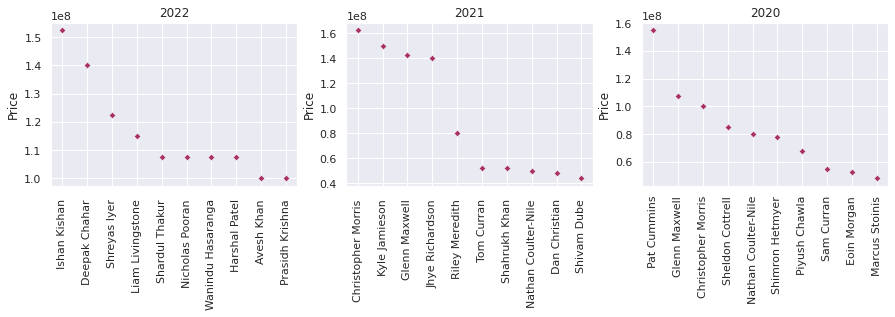

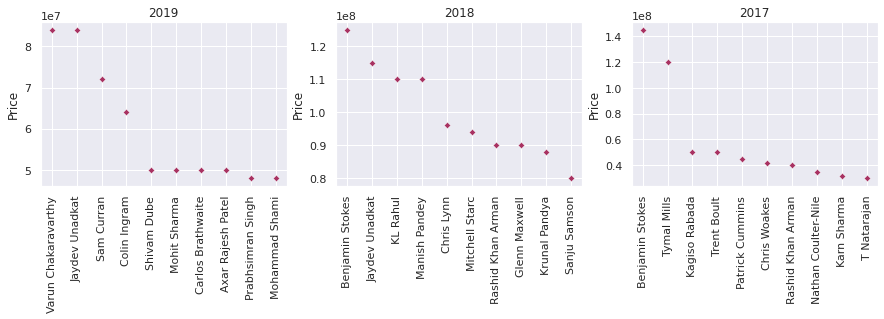

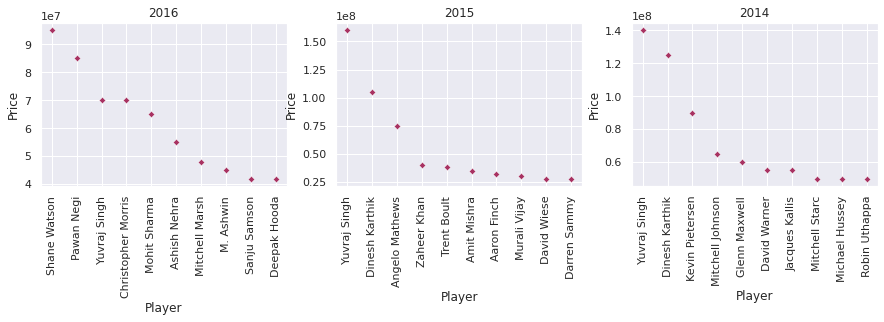

In [413]:
sns.set_theme()
fig, ax = plt.subplots(1,3, figsize = (15,3))
for i in range(len(li[:3])):
    x = data[li[:3][i]]['Player'][:10]
    y = data[li[:3][i]]['Price'][:10]
    sns.scatterplot(x, y , data = data[li[:3][i]], ax = ax[i], color = '#a83262', marker = 'D', s = 20)
    ax[i].set_xticklabels(x,rotation = 90)
    ax[i].set(title = li[:3][i])
    ax[i].set(xlabel = None)
fig, ax = plt.subplots(1,3, figsize = (15,3))
for i in range(len(li[3:6])):
    x = data[li[3:6][i]]['Player'][:10]
    y = data[li[3:6][i]]['Price'][:10]
    sns.scatterplot(x, y , data = data[li[3:6][i]], ax = ax[i],color = '#a83262', marker = 'D', s = 20)
    ax[i].set_xticklabels(x,rotation = 90)
    ax[i].set(title = li[3:6][i])
    ax[i].set(xlabel = None)
fig, ax = plt.subplots(1,3, figsize = (15,3))
for i in range(len(li[6:])):
    x = data[li[6:][i]]['Player'][:10]
    y = data[li[6:][i]]['Price'][:10]
    sns.scatterplot(x, y , data = data[li[6:][i]], ax = ax[i],color = '#a83262', marker = 'D', s = 20)
    ax[i].set_xticklabels(x,rotation = 90)
    ax[i].set(title = li[6:][i])

In [414]:
batting['2021'].loc[batting['2021']['Player']== 'Ishan Kishan']

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Team,Year
52,Ishan Kishan,10,10,1,241,84,26.77,180,133.88,0,2,0,21,10,Mumbai Indians,2021


Ishan Kishan was sold at whopping 16 crores in the year 2022 but his performance in the previous year was below average. This leaves us wondering!

In [415]:
bowling['2018'].loc[bowling['2018']['Player'] == 'JD Unadkat'] 

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Ct,St,Team,Year
135,JD Unadkat,15,15,50.2,0,486,11,3/46,44.18,9.65,27.4,0,0,6,0,Rajasthan Royals,2018


In [416]:
bowling['2017'].loc[bowling['2017']['Player'] == 'JD Unadkat']

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Ct,St,Team,Year
146,JD Unadkat,12,12,45.5,3,322,24,5/30,13.41,7.02,11.4,0,1,9,0,Rising Pune Supergiant,2017


We can see that for all the seasons, there are always 3-4 odd players which are auctioned at exorbitantly high prices. Now, one would expect that these players must have performed very well during previous seasons and similar performance would be displayed in the latest season as well. However, there are a lot of instances where players auctioned at really high prices have displayed average performance. 

We looked at specific players performances of the previous year to the year in which they were sold at extremely high price. `Jaydev Unadkat` for example, has been sold continuously at a high price for the year `2018` and `2017`. Judging by the statistics shown above, he had a brilliant performance in the year 2017 but in 2018 he had a below average performance in the entire season. Still he was the most expensive player for the year 2019 which again doesn't connect the dots. 

This furthermore, strengthens our belief that there are a lot of dynamic external factors which influence the auction prices and hamper the auction process. One of them could be that players are sold at a higher price because not only did he perform good in the IPL but also in other matches carried throughout by other franchises.

## Auction prices classified by player type 
Next, we try to visualize if there is a particular player type out of the categories, wicket keeper, bolwer, batsman, and all-rounder, that is auctioned at higher prices compared to the other player types. For this we consider the auction prices just for the year 2022. 

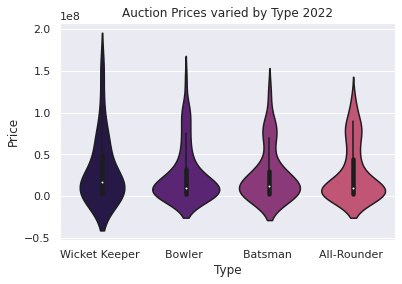

In [417]:
sns.set_theme(style = "darkgrid", palette = 'magma')
sns.violinplot(x = data['2022']['Type'], y= data['2022']['Price'], data = data['2022'])
plt.title('Auction Prices varied by Type 2022');

From the above plot, we can see that players are auctioned at similar prices irrespective of their player category. Thus, it seems reasonable to conclude that the auction prices are not influenced by player type. In the final model, we can definitely skip this as a parameter. 

## Auction prices for different teams
We now try to analyse if the auction prices vary significantly for different teams. As mentioned above, the teams are allocated a pool fund out which they are supposed to place their bids and each team must use atleast 75% of the allocated fund. To analyse the same we plot auction data for the year 2022

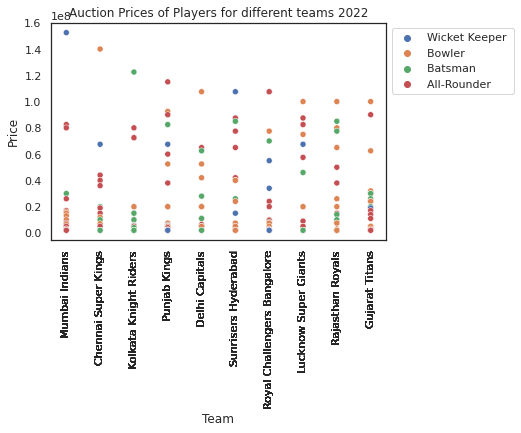

In [418]:
sns.set_theme(style = 'white')
sns.scatterplot(x = data['2022']['Team'], y= data['2022']['Price'], data = data['2022'], hue = data['2022']['Type']);
plt.xticks(data['2022']['Team'],rotation= 90);
plt.legend(bbox_to_anchor = (1.4,1))
plt.title('Auction Prices of Players for different teams 2022');
plt.show()

We can see that during the year 2022, Mumbai Indians placed the highest auction bid for the season. Though, we have plotted data for the year 2022, it has generally been observed that in comparison to other teams, Mumbai Indians usually spend a significantly higher amount of the pool funds. Thus, we can conclude, that in general there are some teams which spend more than the others at the auctions.

## Auction prices trend over the years

Next, we try to analyse the trend in bid prices of teams over the years. For this we plot the median bid price of a team for the different seasons. As it is clear from the above plots that there are a lot of outliers in the auction prices which can skew the plot, we chose to plot the median instead of the mean as it is known that the mean is drastically impacted by the existence of outliers in the data.

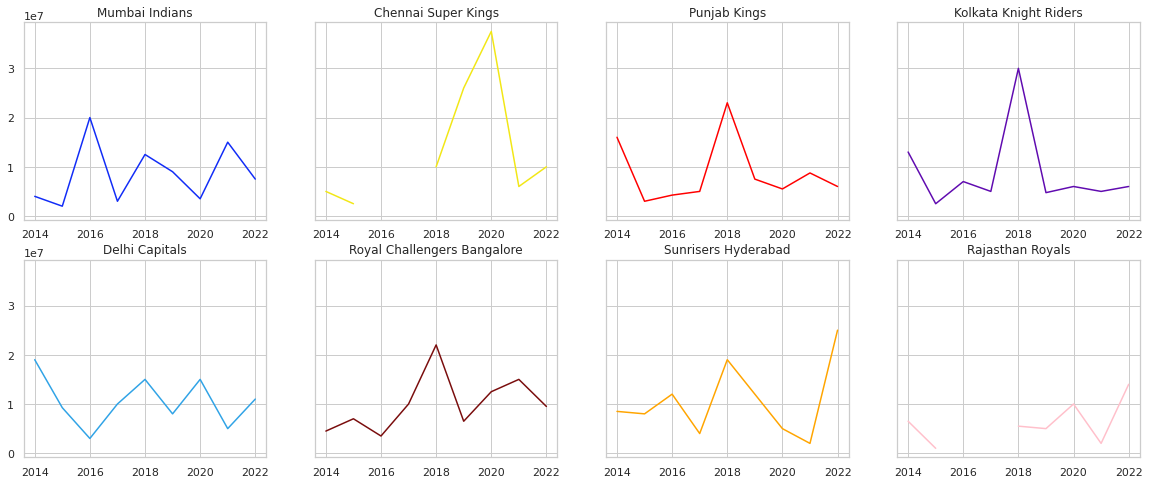

In [419]:
allyears = pd.DataFrame()
for i in li:
    allyears = allyears.append(data[i])
allyears['Team'].replace('Kings XI Punjab', 'Punjab Kings', inplace = True)
sns.set_theme(style = 'whitegrid')
teams = ['Mumbai Indians', 'Chennai Super Kings', 'Punjab Kings', 'Kolkata Knight Riders', 'Delhi Capitals', 'Royal Challengers Bangalore','Sunrisers Hyderabad','Rajasthan Royals']
years = [2022,2021,2020,2019,2018,2017,2016,2015,2014]
color = ['#112cf7', '#f2e716', 'Red','#600bb0','#30a3e6', '#7a0d0d', 'Orange','Pink']
fig , ax = plt.subplots(2,4,figsize = (20,8), sharey = True)
for i in range(len(teams[:4])):
    median = []
    s = allyears.loc[allyears['Team']== teams[i]]
    for year in years:
        s1 = s.loc[s['Year'] == year]
        median.append(np.median(s1['Price']))
    ax[0,i].plot(years,median,color = color[i])
    ax[0,i].set(title = teams[i])
for i in range(4,8):
    median = []
    s = allyears.loc[allyears['Team']== teams[i]]
    for year in years:
        s1 = s.loc[s['Year'] == year]
        median.append(np.median(s1['Price']))
    ax[1,i-4].plot(years,median,color = color[i])
    ax[1,i-4].set(title = teams[i])

From the above plots, we can see that the median auction prices vary drastically from season to season. The gaps in the plot for some teams is because those teams didn't play those years. After carrying out some literature review, we sum up these trends in the following three points :
* It is evident that the plot for each team is in a zig-zag manner, this is because it has been observed teams tend to spend less every consecutive year. One year they spend more and then the other year they don't.
* Secondly, from the table below, it can be seen teams tend to spend more the next year if they win the previous season maybe in order to continue the winning streak.
* Thirdly, there is a steep rise in the year 2018 which can be associated to the an increase in the pool fund by the franchise itself which let the teams spend more.
* Fourthly, there is a dip in 2020 which can obviously be related to Covid-19 which indicates that economic factors also tend to impact the auction dynamics. 

#### Table of winners each year
|Year	|IPL Winner Team         |
|-----  | -----------------------|
|2008	|Rajasthan Royals        |
|2009	|Deccan Chargers         |
|2010	|Chennai Super Kings     |
|2011	|Chennai Super Kings     |
|2012	|Kolkata Knight Riders   |
|2013	|Mumbai Indians          |
|2014	|Kolkata Knight Riders   |
|2015	|Mumbai Indians          |
|2016	|Sunrisers Hyderabad     |
|2017	|Mumbai Indians          |
|2018	|Chennai Super Kings     |
|2019	|Mumbai Indians          |
|2020	|Mumbai Indians          |
|2021	|Chennai Super Kings     |
|2022	|Gujarat Titans          |

Next, we try to visualise the batting and bowling statistics data to get more insight in the data. This will lead us to finally decide on the parameters that should be included in the final model.

## Top 10 Players (Most Runs)
##### Most runs scored by a player in a season which are highest across all seasons as well!

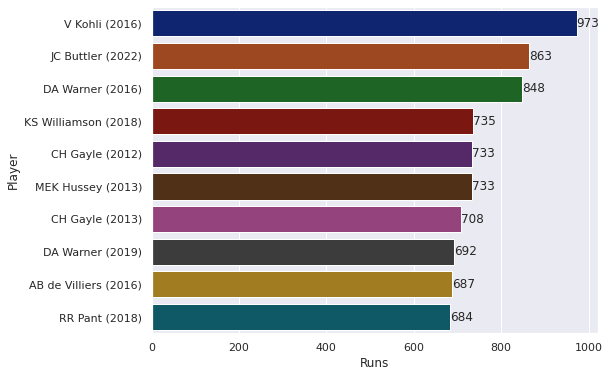

In [420]:
bowling_all = pd.concat(bowling.values(), ignore_index=True)#concatenating bowling stats for all years
batting_all = pd.concat(batting.values(), ignore_index=True)#concatenating batting stats for all years
bowling_all = bowling_all.replace('-', np.NaN)
batting_all = batting_all.replace('-', np.NaN)
batting_all = batting_all.astype({'Runs':'float','SR':'float','Ave':'float','4s':'float','6s':'float','50':'float', '100':'float'})
df1 = batting_all.sort_values('Runs', ascending=False).iloc[:10,]
df1['Player'] = df1['Player'] + ' (' + df1['Year'] + ')'
sns.set_theme()
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(x='Runs', y='Player',data = df1, palette='dark');
ax.bar_label(ax.containers[0]);
plt.show()

In [421]:
batting_all.groupby('Team', dropna=True).mean()

,Runs,Ave,SR,100,50,4s,6s
Team,,,,,,,
Chennai Super Kings,155.514706,23.541117,114.376122,0.044118,0.862745,13.666667,6.215686
Deccan Chargers,113.385417,17.632045,101.819255,0.020833,0.531250,9.968750,4.166667
Delhi Capitals,140.202899,20.000968,116.945217,0.028986,0.695652,13.188406,5.028986
Delhi Daredevils,112.248780,19.277059,102.348818,0.039024,0.585366,10.512195,3.897561
Gujarat Lions,132.200000,17.376562,104.229429,0.000000,0.771429,13.142857,4.428571
Gujarat Titans,179.785714,22.652143,111.340000,0.000000,1.000000,17.857143,5.642857
Kings XI Punjab,119.230126,20.262186,108.054937,0.054393,0.564854,10.962343,4.489540
Kochi Tuskers Kerala,92.526316,15.460000,100.028421,0.000000,0.263158,8.947368,2.789474
Kolkata Knight Riders,120.514925,18.629286,109.470749,0.003731,0.619403,11.257463,4.574627


We notice some discrepencies in Team names like the Rising Pune Supergiants. But there are also different teams with the same city.
This is because there have been some title changes due to changes in team ownership or other reasons unknown.
We will use some of the knowledge we have to effectively curb and merge the teams that have effectively the same roster of players but a different team name and a different owner.
Kochi Tuskers Kerala only played for one year in 2011 and was dissolved right after. Lucknow Super Giants only played in the year 2021. To have a more suitable representation, we will remove these teams from our above dataframe. We only keep the teams which are consistent throughtout all the years in our final model.

#### Table of changes we make to keep everthing more consistent, this is moreover based on true facts. 
Deccan Chargers ---> SRH

Gujarat Lions ---> Gujarat Titans

Pune Warriors ---> Rising Pune Supergiants

Delhi Capitals ---> Delhi Daredevils

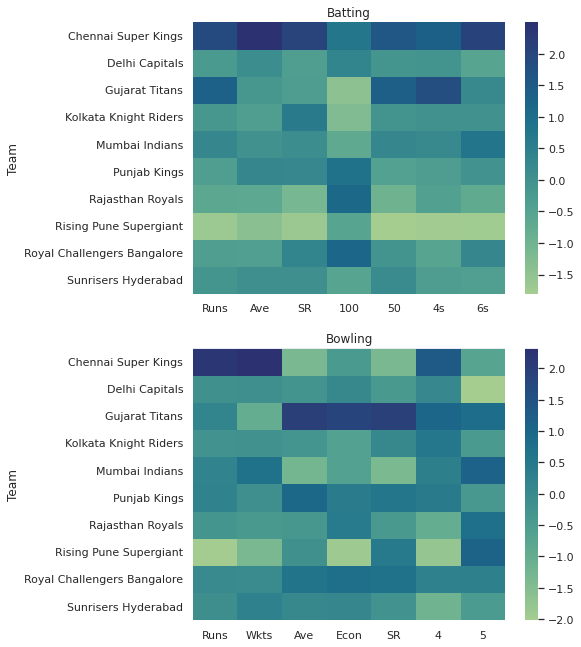

In [422]:
batting_all.replace(['Pune Warriors','Rising Pune Supergiants'], 'Rising Pune Supergiant', inplace=True)
batting_all.replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
batting_all.replace('Gujarat Lions', 'Gujarat Titans', inplace=True)
batting_all.replace('Delhi Daredevils', 'Delhi Capitals',  inplace=True)
batting_all.replace('Kings XI Punjab', 'Punjab Kings', inplace=True)
batting_all_hm = batting_all[(batting_all.Team != 'Kochi Tuskers Kerala') & (batting_all.Team != 'Lucknow Super Giants')]
df2 = batting_all_hm.groupby('Team', dropna=True).mean()
normalized_df=(df2-df2.mean())/df2.std()
bowling_all = bowling_all.astype({'Runs':'float','SR':'float','Ave':'float','Wkts':'float','Econ':'float','5':'float', '4':'float'})
bowling_all.replace(['Pune Warriors',
                    'Rising Pune Supergiants'], 'Rising Pune Supergiant', inplace=True)
bowling_all.replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
bowling_all.replace('Gujarat Lions', 'Gujarat Titans', inplace=True)
bowling_all.replace('Delhi Daredevils', 'Delhi Capitals',  inplace=True)
bowling_all.replace('Kings XI Punjab', 'Punjab Kings', inplace=True)
bowling_all_hm = bowling_all[(bowling_all.Team != 'Kochi Tuskers Kerala') & (bowling_all.Team != 'Lucknow Super Giants')]
df3 = bowling_all_hm.groupby('Team', dropna=True).mean()
normalized_df2 = (df3-df3.mean())/df3.std()
fig, ax = plt.subplots(2,1,figsize = (7,11))
sns.heatmap(normalized_df, cmap='crest', ax = ax[0]);
ax[0].set_title('Batting');
sns.heatmap(normalized_df2, cmap='crest', ax = ax[1]);
ax[1].set_title('Bowling');
plt.show()

Chennai Super Kings by far has been the most well performing team in terms of batting statistics which is supported by the fact that it has won four seasons. Following it, Mumbai Indians has been the second most succesful team, although it has won five seasons. 
This can be because Chennai Super Kings played under the banner of Rising Pune Supergiant for two years. 

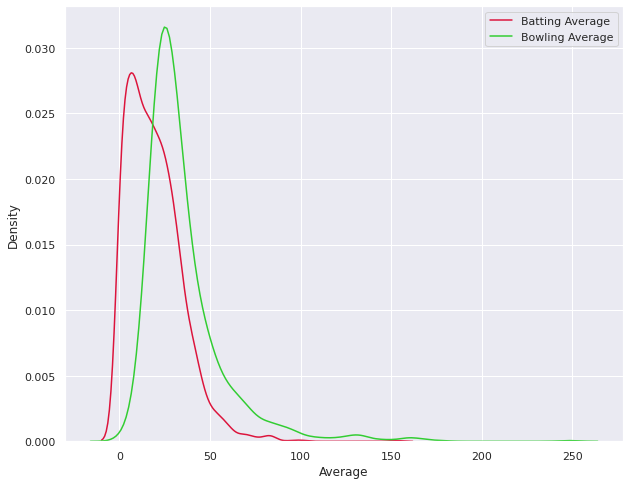

In [423]:
#Dropping NA values for analysis
batting_all_na = batting_all.dropna()
bowling_all_na = bowling_all.dropna()
fig, ax = plt.subplots(figsize=(10, 8))
sns.kdeplot(data=batting_all_na, x='Ave',
            label='Batting Average', ax=ax, color='crimson')
sns.kdeplot(data=bowling_all_na, x='Ave',
            label='Bowling Average', ax=ax, color='limegreen')
plt.xlabel('Average')
plt.legend()

Higher batting averages are considered better for batsmen, and lower bowling averages are considered better for bowlers.
As we can see in the graph, there is a higher density of Bowling Average at a higher Average than the Batting Average. This reflects the dynamic nature of the IPL, where both batsmen and bowlers play 'worse', but it leads to much more exciting play.
We also notice that the Bowling average has more kurtosis and a higher concentration compared to the Batting Average, which reflects the fact that Bowlers do get the shorter end of the stick in the T20 IPL format.

### Combining Player Statistics and Auction Pricing Data

Reading Auction Prices data in a single dataframe

In [424]:
auction_data_path = './Auction Data/'
files = [os.path.join(auction_data_path, file) for file in os.listdir(auction_data_path)]
df4 = pd.concat((pd.read_csv(f) for f in files if f.endswith(
    'csv')), ignore_index=True)
df4 = df4.iloc[:,1:]
df4 = df4.astype({'Year':'string'})
df4['Year'] = df4['Year'].str.strip()
df4 = df4.astype({'Year':'object', 'Type':'category'})
df4.replace('Kings XI Punjab', 'Punjab Kings', inplace=True)
df4.drop(columns = ['Nationality'], inplace = True)
df4

,Player,Type,Price,Team,Year
0,Piyush Chawla,Bowler,"6,75,00,000",Chennai Super Kings,2020
1,Sam Curran,All-Rounder,"5,50,00,000",Chennai Super Kings,2020
2,Josh Hazlewood,Bowler,"2,00,00,000",Chennai Super Kings,2020
3,R. Sai Kishore,Bowler,"20,00,000",Chennai Super Kings,2020
4,Shimron Hetmyer,Batsman,"7,75,00,000",Delhi Capitals,2020
...,...,...,...,...,...
1243,Varun Choudhary,Bowler,"20,00,000",Sunrisers Hyderabad,2021
1244,Baltej Dhanda,Bowler,"20,00,000",Sunrisers Hyderabad,2021
1245,Saurabh Dubey,Bowler,"20,00,000",Sunrisers Hyderabad,2021
1246,Matt Kelly,Bowler,"20,00,000",Sunrisers Hyderabad,2021


In [425]:
batting_all.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Team,Year
0,VR Aaron,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gujarat Titans,2022
1,SA Abbott,1,1,0,7.0,7,7.00,5,140.00,0.0,0.0,0,0.0,1.0,Sunrisers Hyderabad,2022
2,Abdul Samad,2,2,0,4.0,4,2.00,7,57.14,0.0,0.0,1,0.0,0.0,Sunrisers Hyderabad,2022
3,Abhishek Sharma,14,14,0,426.0,75,30.42,320,133.12,0.0,2.0,1,47.0,13.0,Sunrisers Hyderabad,2022
4,MA Agarwal,13,12,0,196.0,52,16.33,160,122.50,0.0,1.0,1,23.0,6.0,Punjab Kings,2022


Comparing the stats data and the price data, we notice a different naming convention. To fix this, we will use the player_info page link we had saved.

In [426]:
name_transitions = pd.read_csv('./misc/name_corrections.csv') #code for obtaining this file is available below

In [427]:
##### takes 6-8 mins to run

# requests_session_2 = requests.Session()
# our_names = []
# their_names = []
# for i in uniq_player_infos:
#     our_name = i.text
#     player_link = holder + i.find('a')['href']
#     player_pg = BeautifulSoup(requests_session_2.get(player_link).content,'lxml')
#     their_name = player_pg.find('h1', class_='ds-text-title-l ds-font-bold').text
#     our_names.append(our_name)
#     their_names.append(their_name)
#name_transitions = pd.DataFrame({'their_names':their_names,'our_names':our_names})
#name_transitions.to_csv('name_corrections.csv')

Merging the dataframes to get the appropriate naming convention,

In [428]:
df6 = pd.merge(batting_all,name_transitions,how='left', left_on='Player',right_on='our_names')
df7 = pd.merge(bowling_all,name_transitions,how='left', left_on='Player',right_on='our_names')

Finally merging the player performance dataset with the Price data.

In [429]:
final_df_batting = pd.merge(df4,df6,how='inner',right_on=['their_names','Year','Team'], left_on=['Player','Year','Team'])
final_df_batting = final_df_batting.drop(columns=['their_names','our_names','Player_y','Unnamed: 0'])
final_df_batting

,Player_x,Type,Price,Team,Year,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,Piyush Chawla,Bowler,"6,75,00,000",Chennai Super Kings,2020,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sam Curran,All-Rounder,"5,50,00,000",Chennai Super Kings,2020,14,11,3,186.0,52,23.25,141,131.91,0.0,1.0,2,12.0,12.0
2,Josh Hazlewood,Bowler,"2,00,00,000",Chennai Super Kings,2020,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Shimron Hetmyer,Batsman,"7,75,00,000",Delhi Capitals,2020,12,11,3,185.0,45,23.12,125,148.00,0.0,0.0,0,11.0,12.0
4,Marcus Stoinis,All-Rounder,"4,80,00,000",Delhi Capitals,2020,17,17,3,352.0,65,25.14,237,148.52,0.0,3.0,1,31.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Ravi Bopara,All-Rounder,"1,00,00,000",Sunrisers Hyderabad,2015,9,8,3,145.0,41,29.00,120,120.83,0.0,0.0,1,6.0,6.0
377,Kane Williamson,All-Rounder,"60,00,000",Sunrisers Hyderabad,2015,2,2,1,31.0,26*,31.00,27,114.81,0.0,0.0,0,1.0,1.0
378,Hanuma Vihari,Batsman,"10,00,000",Sunrisers Hyderabad,2015,5,4,0,39.0,16,9.75,35,111.42,0.0,0.0,0,6.0,0.0
379,Jason Roy,Batsman,"2,00,00,000",Sunrisers Hyderabad,2021,5,5,0,150.0,60,30.00,121,123.96,0.0,1.0,0,21.0,1.0


In [430]:
final_df_bowling = pd.merge(df4,df7,how='inner',right_on=['their_names','Year','Team'], left_on=['Player','Year','Team'])
final_df_bowling = final_df_bowling.drop(columns=['their_names','our_names','Player_y','Unnamed: 0'])
final_df_bowling

,Player_x,Type,Price,Team,Year,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Ct,St
0,Piyush Chawla,Bowler,"6,75,00,000",Chennai Super Kings,2020,7,7,21.0,0,191.0,6.0,2/33,31.83,9.09,21.0,0.0,0.0,0,0
1,Sam Curran,All-Rounder,"5,50,00,000",Chennai Super Kings,2020,14,13,42.0,0,344.0,13.0,3/19,26.46,8.19,19.3,0.0,0.0,7,0
2,Josh Hazlewood,Bowler,"2,00,00,000",Chennai Super Kings,2020,3,3,10.0,0,64.0,1.0,1/19,64.00,6.40,60.0,0.0,0.0,0,0
3,Shimron Hetmyer,Batsman,"7,75,00,000",Delhi Capitals,2020,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0
4,Marcus Stoinis,All-Rounder,"4,80,00,000",Delhi Capitals,2020,17,13,29.4,0,283.0,13.0,3/26,21.76,9.53,13.6,0.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Ravi Bopara,All-Rounder,"1,00,00,000",Sunrisers Hyderabad,2015,9,7,20.0,0,160.0,6.0,2/18,26.66,8.00,20.0,0.0,0.0,2,0
377,Kane Williamson,All-Rounder,"60,00,000",Sunrisers Hyderabad,2015,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
378,Hanuma Vihari,Batsman,"10,00,000",Sunrisers Hyderabad,2015,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
379,Jason Roy,Batsman,"2,00,00,000",Sunrisers Hyderabad,2021,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0


Fixing the format of Price variable,

In [431]:
final_df_batting['Price'] = final_df_batting['Price'].astype('string')
final_df_batting['Price'] = final_df_batting['Price'].str.replace(',', '')
final_df_batting['Price'] = final_df_batting['Price'].astype('float')

In [432]:
final_df_bowling['Price'] = final_df_bowling['Price'].astype('string')
final_df_bowling['Price'] = final_df_bowling['Price'].str.replace(',', '')
final_df_bowling['Price'] = final_df_bowling['Price'].astype('float')

<AxesSubplot:xlabel='SR', ylabel='Price'>

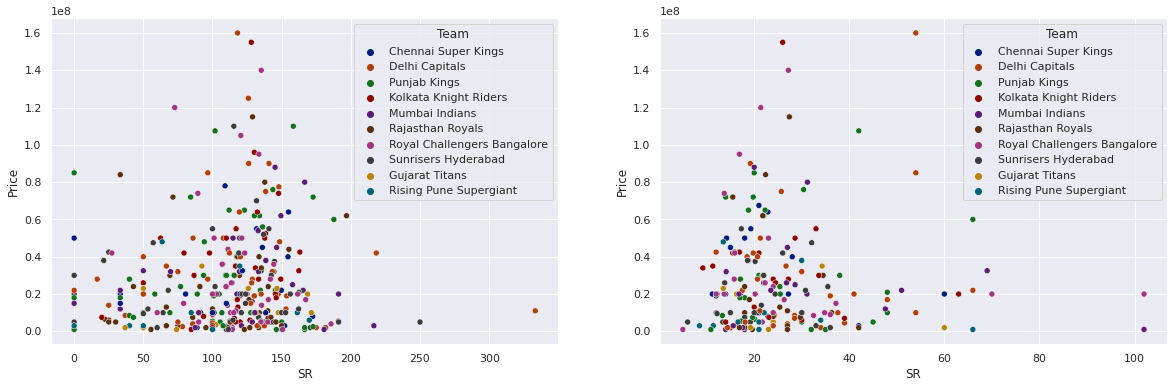

In [433]:
fig,ax = plt.subplots(1,2,figsize = (20,6))
sns.scatterplot(x = 'SR', y = 'Price', data = final_df_batting, palette='dark', hue='Team',ax = ax[0])
sns.scatterplot(x = 'SR', y = 'Price', data = final_df_bowling, palette='dark', hue='Team', ax = ax[1])

Auction Prices tend to be high for batsmen with higher Strike Rate.
While for Bowlers, prices tend to be higher for bowlers with lower Strike Rate.


## Modelling and Analysis

We will use several Regressors to model our data, namely Linear Regression, Support Vector Regressor, Random Forest Regressor, AdaBoost Regressor and Gradient Boosting Regressor or XGBoost.

In [434]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 0
regressors= {"Linear Regression": LinearRegression(normalize=True),
               "Random Forest": RandomForestRegressor(max_depth=5, random_state=RANDOM_SEED),
               'XGBoost':GradientBoostingRegressor(random_state=RANDOM_SEED),
               'SVR':SVR()}

Reshaping and cleaning our data

In [435]:
final_df_batting_na = final_df_batting.dropna()
y = final_df_batting_na['Price']
y = y.astype('string')
y = y.str.replace(',', '')
y = y.astype('float')
y = y.to_numpy().reshape(-1, 1)
X = final_df_batting_na[['Mat','Inns','Runs','Ave','SR']]

We will standardize our feature variables and our output variable.

In [436]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Splitting the dataset into train and test dataset with a test size = 0.1

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Now we shall make predictions based on our regressors,

In [438]:
predictions = {}
MAE = {}
for name, regressor in regressors.items():
    z = regressor.fit(X_train, y_train)
    prediction = z.predict(X_test)
    mae = sklearn.metrics.mean_absolute_error(prediction,y_test)
    predictions[name] = prediction
    MAE[name] = mae

Lets plot our predictions to see how different they are from one another

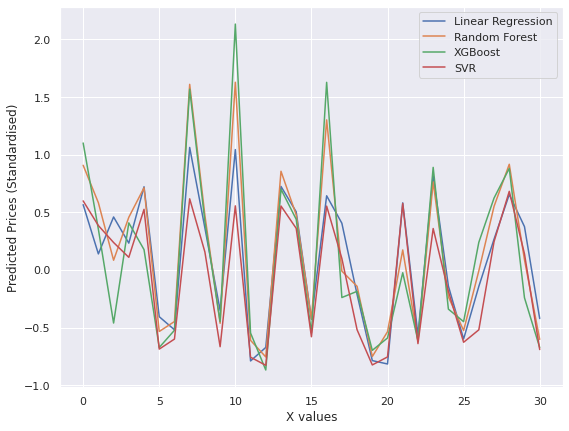

In [439]:
fig,ax = plt.subplots(figsize = (9,7))
for i in predictions.keys():
    plt.plot(predictions[i],label = i)
plt.xlabel('X values')
plt.ylabel('Predicted Prices (Standardised)')
plt.legend()

**SVR** has the lowest error of all of the four regressors, and as we can see in the graph, it has the least noisy predictions.

Our models are quite similar to one another, yet are unable to grasp the training data in a way to make reasonable predictions, and have unusually high error values. This highlights a huge limitation of price prediction in any sports league. The prices negotiated for the players are quite often largely affected by the business strategies and various factors other than their performance.And quite often, performances that might not be relevant to the particular context can still affect the prices.Hence, trying to pin an accurate estimate for such a variable can be incredibly difficult. 

# Conclusion <a name="conclusion"></a>
We can conclude that there exists a clear gap between the economic value of player computed purely objectively on the basis of their performance and their auction prices. Our analysis have lead us to the conclusion that there is a lot of subjectivity involved in the auction process along with numerous external factors being at play which can't be quantified. We list below a few of them:
* Apart from performance, a player's leadership qualities impact their auction price. As cricket is a dynamic game which calls for constant change of strategies and a team's chances of winning are dependent heavily on the leadership and decision making abilities of the team Captain. Thus, players displaying such traits are likely to be sold off at higher auction prices.
* From a franchise's perspective, IPL isn't just about winning matches. Their primary objective is to generate revenue. This is done through sponsorships, merchandising etc. Thus, franchises prefer to have those players onboard which command a good fan following. The popularity of a player generates more revenue from sale of tickets and player merchandise. Moreover, international players bring along with them an international fanbase. Hence, players having a large fan following are likely to have higher auction prices compared to other players.
* There are numerous other factors such as political dynamics which have an impact on auction prices of players. One such instance was in response to the Mumbai bomb attacks in 2008, Pakistan players were life banned from participating in the IPL. Such factors also indirectly influence the auction prices of players.
* The auction process has inherent stochasticity attached to it. The franchises constantly remodel their bidding strategy in response to the actions of other teams. As a result, if one team shows immense interest in a player, it influences the other teams which eventually leads to a rise in the player's bids.

# References <a name="references"></a>
## .1 Data Sources <a name="data-sources"></a>
  * https://www.iplt20.com/auction
  * https://www.cricwindow.com/
  * https://www.espncricinfo.com/

## .2. Reference papers: <a name="papers"></a>
  * http://www.worldacademicunion.com/journal/SSCI/sscivol05no01paper01.pdf
  * https://vslir.iima.ac.in:8080/jspui/bitstream/11718/14019/1/IC15-003.pdf
  * https://content.iospress.com/articles/journal-of-sports-analytics/jsa200580
  * http://www.eia.feaa.ugal.ro/images/eia/2017_1/Rastogi.pdf
  * https://ieeexplore.ieee.org/document/9198668